# Regresion Logistica

Utilizando la tecnica del gradiente descendiente en este ejemplo intentaremos adivinar si a una persona que le damos un prestamo nos devolvera el dinero

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.DataFrame({"Salario":[1500,600,1800,700,1400,3100,2900,4200,5100,4500],
                  "Ahorro": [11000,5700,1500,7100,4900,11000,13000,14000,18000,16000],
                  "Devolvio":[0,0,0,0,0,1,1,1,1,1]})

In [16]:
df.head()

,Salario,Ahorro,Devolvio
0,1500,11000,0
1,600,5700,0
2,1800,1500,0
3,700,7100,0
4,1400,4900,0


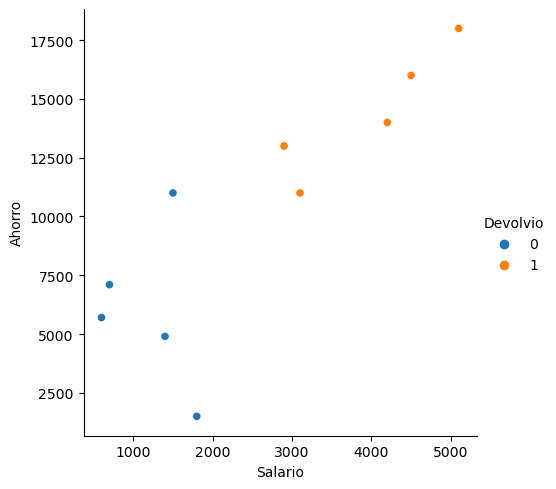

In [17]:
sns.relplot(x="Salario", y="Ahorro", hue="Devolvio", data=df);

In [158]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

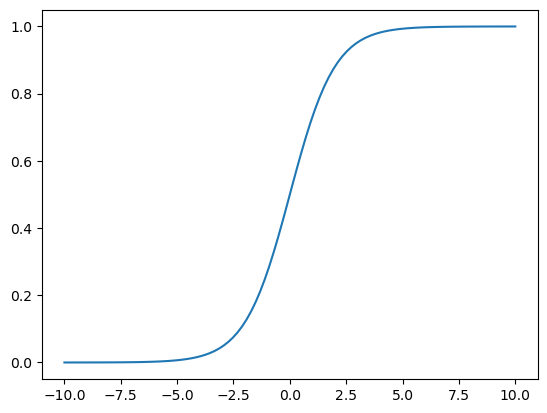

In [160]:
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), '-');

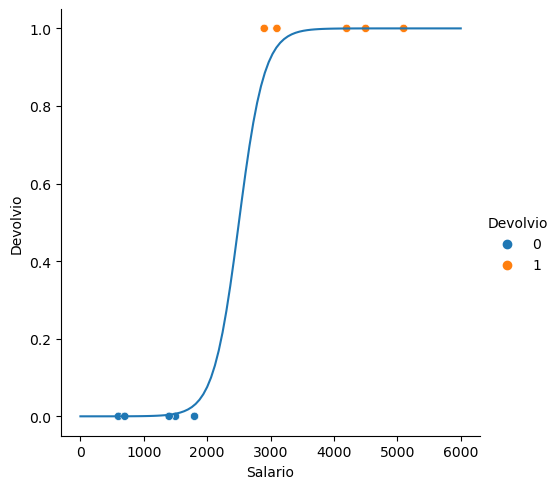

In [130]:
sns.relplot(x="Salario", y="Devolvio", hue="Devolvio", data=df);
plt.plot(np.linspace(0,6000,100), sigmoid(5*(np.linspace(0,6000,100)/1000-2.5)), '-');

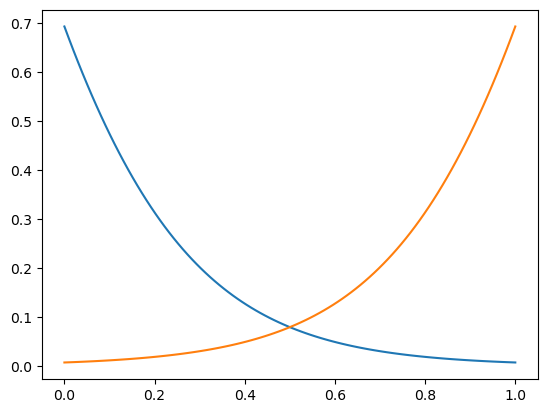

In [182]:
costoy1 = lambda x: -np.log(sigmoid(x))
plt.plot(np.linspace(0,1,100), costoy1(np.linspace(0,5,100)), '-');
costoy0 = lambda x: -np.log(1-sigmoid(x))
plt.plot(np.linspace(0,1,100), costoy0(np.linspace(-5,0,100)), '-');

## Con Scikit Learn

In [256]:
from sklearn.linear_model import LogisticRegression
X = df.loc[:,["Salario","Ahorro"]].to_numpy()
y = df.loc[:,"Devolvio"].to_numpy()
clf = LogisticRegression(random_state=0).fit(X, y)

In [257]:
clf.predict([[3_000,15_000]])

array([1])

In [258]:
clf.predict([[900,8_000]])

array([0])

## Con PyTorch

In [238]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

In [246]:
x = df.loc[:,["Salario","Ahorro"]].to_numpy()
x[:,0] = x[:,0]/ 1000
x[:,1] = x[:,1]/ 10000
y = df.loc[:,["Devolvio"]].to_numpy()

In [247]:
x_data = Variable(torch.Tensor(x))
y_data = Variable(torch.Tensor(y))

In [248]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) # sigmoid(X * W + b)
        return y_pred
model = LogisticRegression()

In [249]:
criterion = torch.nn.BCELoss()

In [250]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [251]:
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_data)
    # Compute Loss
    loss = criterion(y_pred, y_data)
    if epoch%100 == 0: print(f"costo:{loss}")
    # Backward pass
    loss.backward()
    optimizer.step()

costo:0.533144474029541
costo:0.2375362366437912
costo:0.1749037802219391
costo:0.14264510571956635
costo:0.12254415452480316


In [253]:
new_x = Variable(torch.Tensor([[3_000/1_000,15_000/10_000]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred)

predicted Y value:  tensor([[0.9673]], grad_fn=<SigmoidBackward0>)


In [254]:
new_x = Variable(torch.Tensor([[900/1_000,8_000/10_000]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred)

predicted Y value:  tensor([[0.2240]], grad_fn=<SigmoidBackward0>)
